# Introduction to Modern Cryptography: Quantum Computing

For this exercise, we'll work with the Quantum Computing framework provided by IBM, called **qiskit**

Be aware of some pitfalls in qiskit, expecially: [https://qiskit.org/documentation/explanation/endianness.html](https://qiskit.org/documentation/explanation/endianness.html)

## 1. Counting with Quantum Fourier Transfrom

Get yourself familiar with the [qiskit](https://qiskit.org/documentation/getting_started.html) framework and its [QFT](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform) implemementation

### 1.1 QFT
Implement the circuit for the QFT and inverse QFT for **four** qubits in qiskit


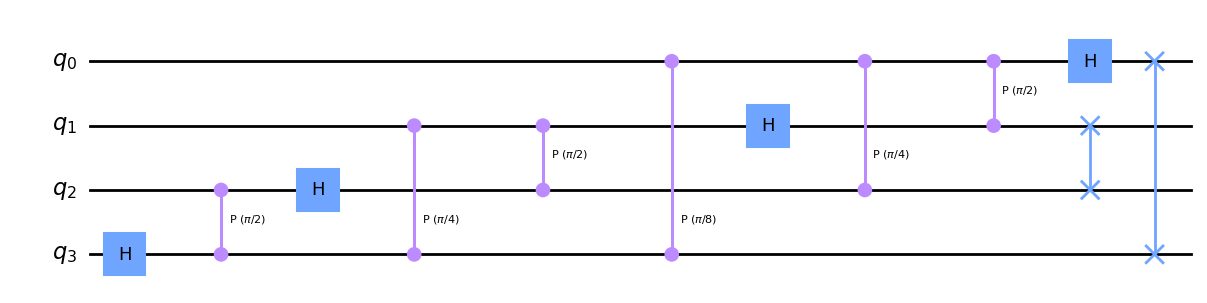

In [43]:
import numpy as np
from qiskit import * 
from qiskit.circuit.library import QFT

## PLACE YOUR CODE TO DRAW THE QFT CIRCUIT HERE

qft = QFT(4)
qft.decompose().draw('mpl')

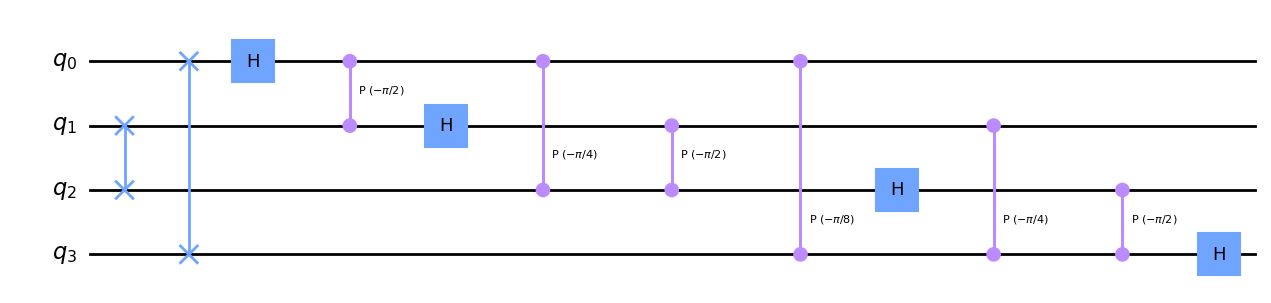

In [11]:
import numpy as np
from qiskit import * 
from qiskit.circuit.library import QFT

## PLACE YOUR CODE TO DRAW THE Inverse QFT CIRCUIT HERE

iqft = QFT(4, inverse=True)
iqft.decompose().draw("mpl")

### 1.2 QFT Counter
Remember the unit circle, that we used to describe what the Discrete Fourier Transform does.
<div style="max-width:300px"><img src="circuits/ucircle.png"/></div>

With that, you can imagine arithmetic operations in the "Fourier-Basis", where every position on the unit circle represents a number.
By rotating a given state in this circle by a certain angle, one can add/subtract/multiply number (modulus n) in the fourier basis.
The application of an "Inverse QFT" will lead back to the computational basis.

**Ecercise**
Implement a *Counter* in the Fourier basis by, that can counter from 0 - 15
- Create a register for the counter
- Transfom it to the Fourier Basis
- increase the counter a given random number of times
- Measure the result

*(hint: read this tutorial: https://pennylane.ai/qml/demos/tutorial_qft_arithmetics/)*

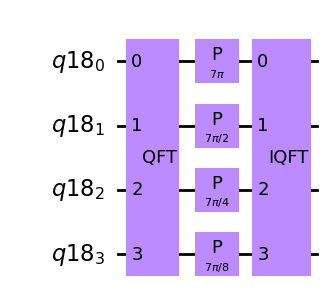

In [58]:
import numpy as np
import random
from qiskit import * 
from qiskit.circuit.library import QFT

k = random.randint(1,15)
# DEVELOP YOUR ADDER HERE
#k = 1
counter = QuantumRegister(4)
qc = QuantumCircuit(counter)
qc.append(QFT(4,do_swaps=True), counter)

for q in range(len(counter)):
    qc.p(k*np.pi/(2**q), counter[q])

qc.append(QFT(4,inverse=True,do_swaps=False), counter)
qc.draw('mpl')

In [30]:
## VERIFY THAT YOUR ADDER DOES WHAT EXPECTED

In [59]:
from qiskit.quantum_info import Statevector
print(k)
state = Statevector.from_int(0,2**4).evolve(qc)
state.draw('latex')

7


<IPython.core.display.Latex object>

## 2. Shor's Algorithm
Try to implement Shor's Algorithm by yourself. 

In [ ]:
!pip install qiskit_algorithms

In [3]:
from circuits.Shor import *
backend = Aer.get_backend('qasm_simulator')

#### 2.1. Find Period
Use the class ```MyShor(a=2, N=21)``` provided under ```from circuits.Shor import *``` to find the period of the function ```a^x mod N```

*(hint: depending on your computer, this might take a few seconds/minutes)*

In [5]:
from circuits.Shor import *

a = 2
N = 21

#PUT YOUR CODE HERE
from qiskit import QuantumCircuit, transpile, Aer, execute
def run(circuit):
    job = execute(circuit, backend, shots = 1024)
    r = job.result().get_counts()
    return r


shor = MyShor(a=a,N=N)#,quantum_instance=backend)
circ = shor.construct_circuit(measurement=True)

r = run(circ)
p = shor.get_period(r)
print('Found period ',p)

Found period  6


#### 2.2. Shor's Algorithm to break RSA
Implement the full Shor's algorithm, that given a public key ```pk``` and ```N``` outputs the secret key ```sk```

Test you implementation with the following inputs:
- pk = 5, N = 21
- pk = 3, N = 55

In [11]:
#Input
# BE CAREFUL, THIS MIGHT TAKE A WHILE
breakRSA(pk=17,N=21)

a: 2, N: 21
Found z= 7
Found private key  (1.0, 5.0, -7.0)


In [ ]:
import random
def breakRSA(pk: int, N: int):
    #DEVELOP YOUR CODE TO BREAK RSA HERE

def shors(N: int):
    #IMPLEMENT SHOR'S ALGORITHM HERE

In [9]:
#Solution

import random
def gcdExtended(a, b): 
    # Base Case 
    if a == 0 :  
        return b,0,1  
    gcd,x1,y1 = gcdExtended(b%a, a) 
     
    # Update x and y using results of recursive 
    # call 
    x = y1 - (b//a) * x1 
    y = x1 
    return gcd,x,y

def breakRSA(pk: int, N: int):
    p = shors(N)
    q = N/p
    phi = (p-1)*(q-1)
    
    sk = gcdExtended(pk, phi);
    print('Found private key ', sk)
    
def shors(N: int):
    a = random.randint(2,int(N/2))
    shor = MyShor(a=a,N=N,quantum_instance=backend)
    circ = shor.construct_circuit(measurement=True)
    print(f'a: {a}, N: {N}')
    #print(circ)
    r = run(circ)
    p = shor.get_period(r)

    a_p = int(pow(a,p/2))
    z_minus = math.gcd(a_p-1, N)
    z_plus = math.gcd(a_p+1, N)
    if z_minus != 1:
        print('Found z=', z_minus)
        # CHANGE Xiao-Ting:
        # Nothing is returned here, but we need to return z
        # as this is the variable p that is needed in breakRSA()
        return z_minus
    elif z_plus != N:
        print('Found z=', z_plus)
        # CHANGE Xiao-Ting: Same as above
        return z_plus
    else:
        print('Try another a')
        
